# PA: Бэггинг и случайный лес

## Фундамент

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn import model_selection, datasets, tree, ensemble

In [47]:
def write_answer(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(answer))

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [18]:
digits = datasets.load_digits()
images = digits.images
X = digits.data
y = digits.target

In [12]:
len(X[1])

64

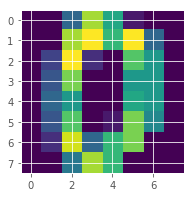

In [19]:
plt.figure(1, figsize=(3, 3))
plt.imshow(images[0])
plt.show()

## Описание

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

### 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [31]:
clf_tree = tree.DecisionTreeClassifier(random_state=3)

In [32]:
score_tree = model_selection.cross_val_score(clf_tree, X, y, cv=10)

In [45]:
ans1 = (score_tree.mean())
print(ans1)

0.8236459977395126


In [48]:
write_answer(ans1, "ans1.txt")

## 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [36]:
from sklearn.model_selection import *

In [37]:
clf_bag = ensemble.BaggingClassifier(n_estimators=100, random_state=3)

In [49]:
score_bag = cross_val_score(clf_bag, X, y, cv=10)
ans2 = score_bag.mean()
print(ans2)

0.9226398281701403


In [51]:
write_answer(ans2, "ans2.txt")

## 3

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [52]:
max_features = int(X.shape[1] ** 0.5)
max_features

8

In [54]:
clf_bag_sqrt = ensemble.BaggingClassifier(
    n_estimators=100, random_state=3, max_features=max_features)
score_bag_sqrt = cross_val_score(clf_bag_sqrt, X, y, cv=10)
ans3 = score_bag_sqrt.mean()
print(ans3)

0.9327120591516926


In [55]:
write_answer(ans3, "ans3.txt")

## 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же sqrt{d}  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [60]:
clf_tree_sqrt = tree.DecisionTreeClassifier(random_state=3, max_features=max_features)
clf_bag_sqrt_each = ensemble.BaggingClassifier(
    clf_tree_sqrt, n_estimators=100, random_state=3)

In [61]:
score_bag_sqrt_each = cross_val_score(clf_bag_sqrt_each, X, y, cv=10)
ans4 = score_bag_sqrt_each.mean()
print(ans4)

0.9555544994632914


In [84]:
write_answer(ans4, "ans4.txt")

## 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [74]:
from sklearn.ensemble import RandomForestClassifier

def score(num_estimators=100, num_features='auto', max_depth=None):
    rf_estimator = RandomForestClassifier(
        n_estimators=num_estimators, 
        max_features=num_features,
        max_depth=max_depth,
        random_state=3)
    scores = cross_val_score(rf_estimator, X, y, cv=10)
    return scores.mean()

In [75]:
range_estimators = [5, 10, 15, 30, 50, 100]
scores_rf_trees = [score(num_estimators=num_estimators) 
              for num_estimators in range_estimators]

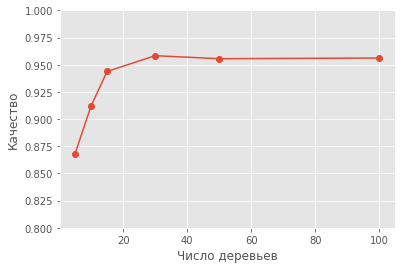

In [76]:
plt.grid(True)
plt.plot(range_estimators, scores_rf_trees, marker='o')
plt.xlabel('Число деревьев')
plt.ylabel('Качество')
plt.ylim([0.8, 1]);

1) Случайный лес сильно переобучается с ростом количества деревьев -  
2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев +  
3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. +  


In [77]:
range_features = np.array([1, 5, 10, 15, 25, 40, 50])
scores_rf_features = [score(num_features=num_features) 
                      for num_features in range_features]

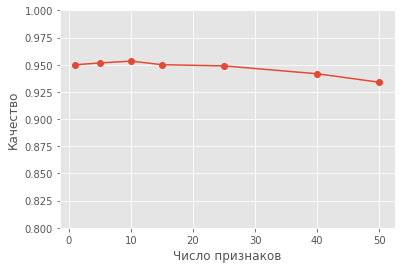

In [78]:
plt.grid(True)
plt.plot(range_features, scores_rf_features, marker='o')
plt.xlabel('Число признаков')
plt.ylabel('Качество')
plt.ylim([0.8, 1]);

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. +  

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. -  

In [80]:
range_depth = np.array([1, 2, 4, 6, 10, 15, None])
scores_rf_depth = [score(max_depth=depth) for depth in range_depth]

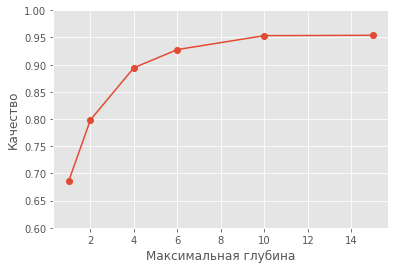

In [81]:
plt.grid(True)
plt.plot(range_depth, scores_rf_depth, marker='o')
plt.xlabel('Максимальная глубина')
plt.ylabel('Качество')
plt.ylim([0.6, 1]);

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. -  

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). +  


In [82]:
true_statements = [2, 3, 4, 7]

In [83]:
write_answer(true_statements, "ans5.txt")